In [1]:
# Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# URL for GET requests to retrieve vehicle data

# HP Atk Def SpAtk SpDef Speed

index = [0, 1, 2, 3, 4, 5]
stats1 = []
stats2 = []
stats3 = []
stats4 = []
stats5 = []
stats6 = []
stats7 = []
stats8 = []
stats9 = []

url1 = "https://pokeapi.co/api/v2/pokemon/1"
url2 = "https://pokeapi.co/api/v2/pokemon/2"
url3 = "https://pokeapi.co/api/v2/pokemon/3"
url4 = "https://pokeapi.co/api/v2/pokemon/4"
url5 = "https://pokeapi.co/api/v2/pokemon/5"
url6 = "https://pokeapi.co/api/v2/pokemon/6"
url7 = "https://pokeapi.co/api/v2/pokemon/7"
url8 = "https://pokeapi.co/api/v2/pokemon/8"
url9 = "https://pokeapi.co/api/v2/pokemon/9"
urlsb = "https://pokeapi.co/api/v2/move/solar-beam"
urlft = "https://pokeapi.co/api/v2/move/flamethrower"
urlhp = "https://pokeapi.co/api/v2/move/hydro-pump"

response1 = requests.get(url1)
response2 = requests.get(url2)
response3 = requests.get(url3)
response4 = requests.get(url4)
response5 = requests.get(url5)
response6 = requests.get(url6)
response7 = requests.get(url7)
response8 = requests.get(url8)
response9 = requests.get(url9)
responsesb = requests.get(urlsb)
responseft = requests.get(urlft)
responsehp = requests.get(urlhp)

response1_json = response1.json()
response2_json = response2.json()
response3_json = response3.json()
response4_json = response4.json()
response5_json = response5.json()
response6_json = response6.json()
response7_json = response7.json()
response8_json = response8.json()
response9_json = response9.json()
responsesb_json = responsesb.json()
responseft_json = responseft.json()
responsehp_json = responsehp.json()

for i in index:
    stats1.append(response1_json['stats'][ i ]['base_stat'])
    stats2.append(response2_json['stats'][ i ]['base_stat'])
    stats3.append(response3_json['stats'][ i ]['base_stat'])
    stats4.append(response4_json['stats'][ i ]['base_stat'])
    stats5.append(response5_json['stats'][ i ]['base_stat'])
    stats6.append(response6_json['stats'][ i ]['base_stat'])
    stats7.append(response7_json['stats'][ i ]['base_stat'])
    stats8.append(response8_json['stats'][ i ]['base_stat'])
    stats9.append(response9_json['stats'][ i ]['base_stat'])
    
Bulbasaur_Total = sum(stats1)
Ivysaur_Total = sum(stats2)    
Venasaur_Total = sum(stats3)
Charmander_Total = sum(stats4)
Charmeleon_Total = sum(stats5)
Charizard_Total = sum(stats6)
Squirtle_Total = sum(stats7)
Wartortle_Total = sum(stats8)
Blastoise_Total = sum(stats9)

array1 = [Bulbasaur_Total, Ivysaur_Total, Venasaur_Total]
array2 = [Charmander_Total, Charmeleon_Total, Charizard_Total]
array3 = [Squirtle_Total, Wartortle_Total, Blastoise_Total]

Venasaur_Solar_Beam_Power = responsesb_json['power']
Charizard_Flamethrower_Power = responseft_json['power']
Blastoise_Hydro_Pump_Power = responsehp_json['power']
Charizard_Fun_Power = 120

Venasaur_SpAtk = stats3[3]
Charizard_SpAtk = stats6[3]
Blastoise_SpAtk = stats9[3]

Venasaur_POWER = round((2*50 + 10)/250 * (Venasaur_SpAtk/100) * Venasaur_Solar_Beam_Power + 2 * 1)
Charizard_POWER = round((2*50 + 10)/250 * (Charizard_SpAtk/100) * Charizard_Flamethrower_Power + 2 * 1)
Blastoise_POWER = round((2*50 + 10)/250 * (Blastoise_SpAtk/100) * Blastoise_Hydro_Pump_Power + 2 * 1)

Charizard_Test_POWER = round((2*50 + 10)/250 * (Charizard_SpAtk/100) * Charizard_Fun_Power + 2 * 1)

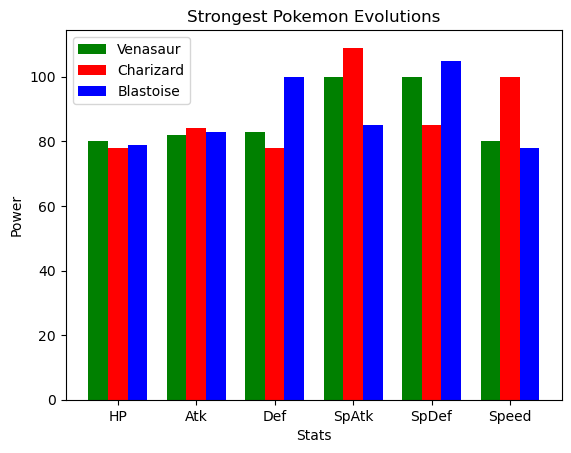

In [3]:
fig, ax = plt.subplots()
bar_width = 0.25
X = np.arange(6)

p1 = plt.bar(X, stats3, bar_width, color='g',
label='Venasaur')

p2 = plt.bar(X + bar_width, stats6, bar_width,
color='r',
label='Charizard')

p3 = plt.bar(X + bar_width + bar_width, stats9, bar_width,
color='b',
label='Blastoise')

plt.xlabel('Stats')
plt.ylabel('Power')
plt.title('Strongest Pokemon Evolutions')
plt.xticks(X + (bar_width) , ("HP", "Atk", 
"Def", "SpAtk", "SpDef", "Speed"))
plt.legend()

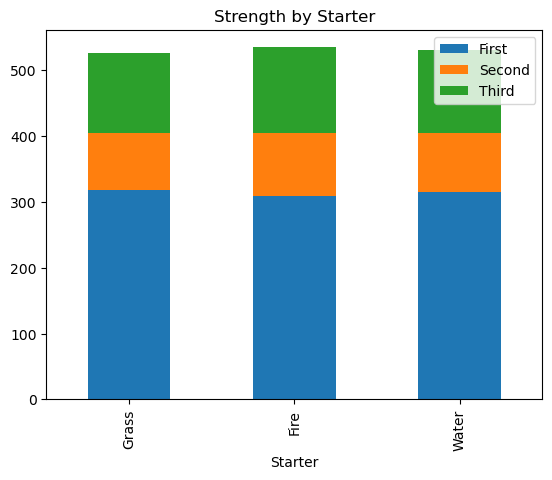

In [4]:
df = pd.DataFrame([['Grass', Bulbasaur_Total, Ivysaur_Total - Bulbasaur_Total, Venasaur_Total - Ivysaur_Total], 
                   ['Fire', Charmander_Total, Charmeleon_Total - Charmander_Total, Charizard_Total - Charmeleon_Total], 
                   ['Water', Squirtle_Total, Wartortle_Total - Squirtle_Total, Blastoise_Total - Wartortle_Total]],
                  columns=['Starter', 'First', 'Second', 'Third'])

df.plot(x='Starter', kind='bar', stacked=True,
        title='Strength by Starter')
plt.show()

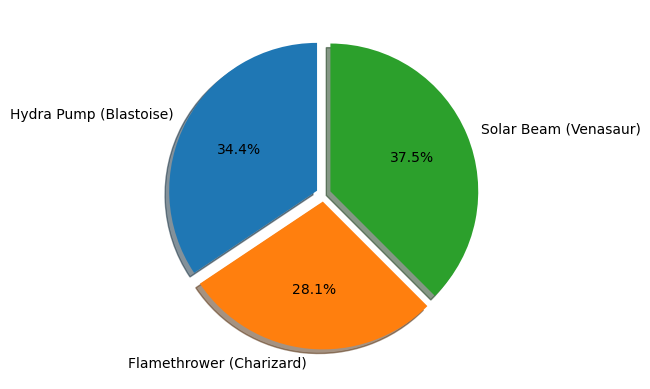

In [5]:
labels = 'Hydra Pump (Blastoise)', 'Flamethrower (Charizard)', 'Solar Beam (Venasaur)'
sizes = [Blastoise_Hydro_Pump_Power, Charizard_Flamethrower_Power, Venasaur_Solar_Beam_Power]
explode = (0.05, 0.05, 0.05)


def autopct_format(sizes):
    def my_format(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.show()

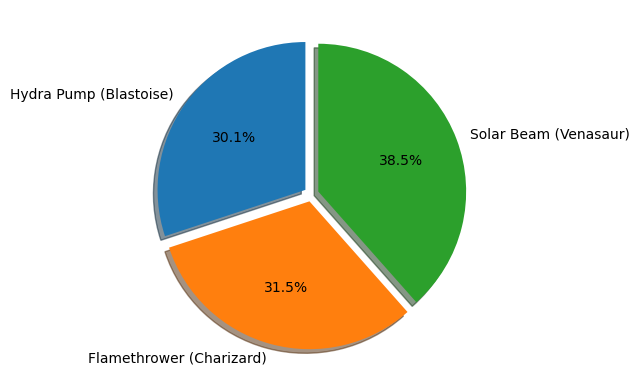

In [6]:
labels = 'Hydra Pump (Blastoise)', 'Flamethrower (Charizard)', 'Solar Beam (Venasaur)'
sizes = [Blastoise_POWER, Charizard_POWER, Venasaur_POWER]
explode = (0.05, 0.05, 0.05)


def autopct_format(sizes):
    def my_format(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.show()